In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly
import nbformat

In [2]:
stats = pd.read_csv('../Data/Players_stats2024.csv')

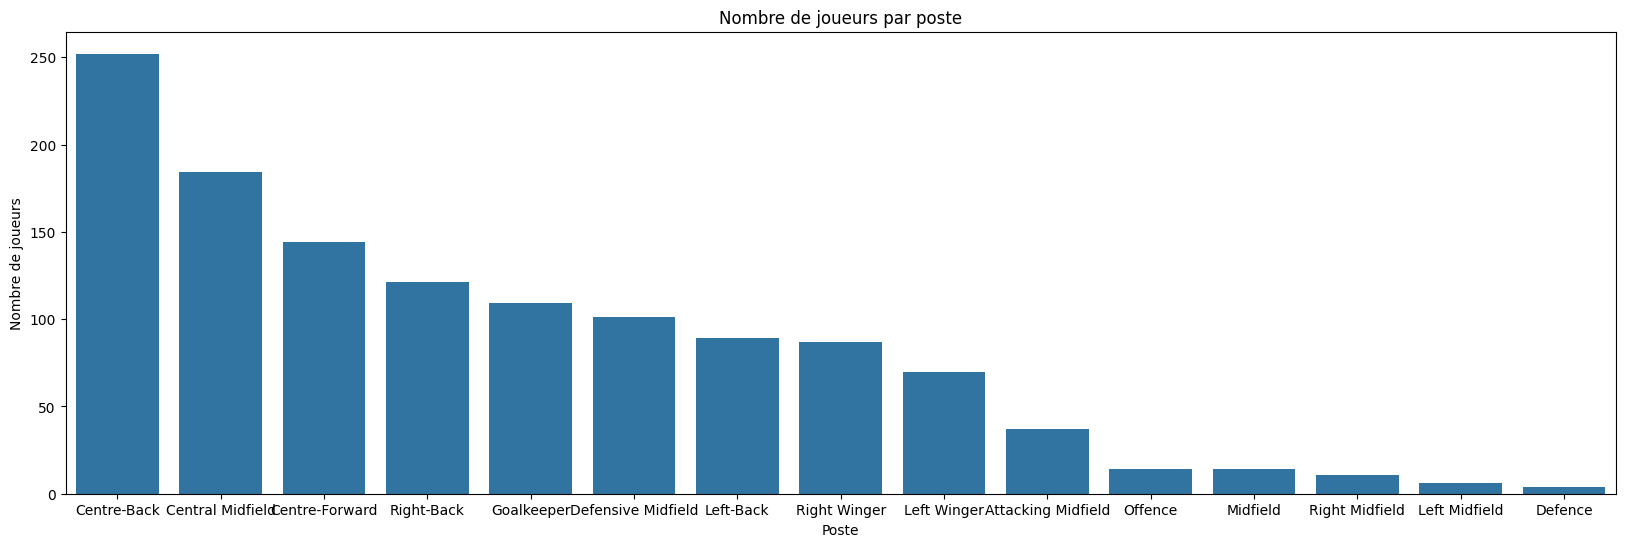

In [3]:
players_by_position = stats['poste'].value_counts().reset_index()
players_by_position.columns = ['poste', 'Count']

# Créer un graphique en barres
plt.figure(figsize=(20, 6))
sns.barplot(x='poste', y='Count', data=players_by_position)
plt.xlabel('Poste')
plt.ylabel('Nombre de joueurs')
plt.title('Nombre de joueurs par poste')
plt.show()

In [7]:
fig = px.scatter(stats, x='Assists', y='Goals', size='match_played', color='poste',
                 hover_data=['prénom', 'nom'], title='Buts et passes décisives par match')
fig.show()

C:\Users\basti\AppData\Local\Temp\ipykernel_14412\1324178619.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




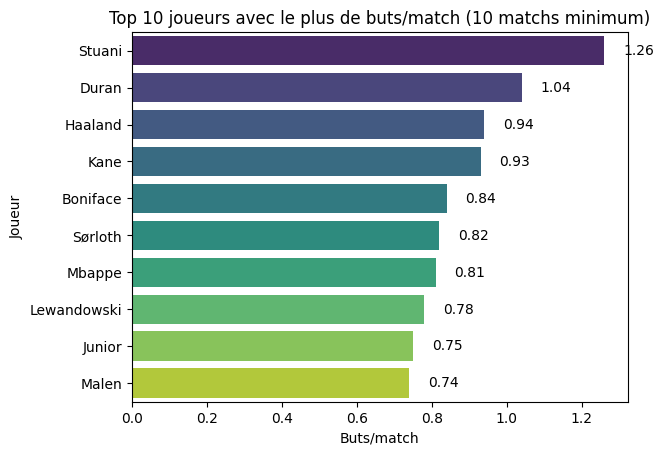

In [8]:
filtered_stats = stats[stats['match_played'] > 10]
top_scorers = filtered_stats.nlargest(10, 'Goals')

sns.barplot(y=top_scorers['nom'], x=top_scorers['Goals'], palette='viridis')
plt.title('Top 10 joueurs avec le plus de buts/match (10 matchs minimum)')
plt.xlabel('Buts/match')
plt.ylabel('Joueur')

# Ajouter les valeurs sur les barres
for index, value in enumerate(top_scorers['Goals']):
    plt.text(value + 0.05, index, f"{value:.2f}", va='center')  # Décalage pour lisibilité

plt.show()
